In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
    
import sys 
sys.path.insert(0, '../src/')
import jsm_SHMR

import warnings; warnings.simplefilter('ignore')
from IPython.display import display, Math


In [3]:
def stack(samples, stack):    
    nsteps = samples.shape[0]
    ssteps = nsteps - stack
    s = samples[ssteps:nsteps,:,:].shape
    return samples[ssteps:nsteps,:,:].reshape(s[0] * s[1], s[2]) 

def best_fit_values(sample, labels):
    list_val = []
    for i in range(4):
        mcmc = np.percentile(sample[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        #display(Math(txt))
        list_val.append([mcmc[1], q[0], q[1]])
    return np.array(list_val)

def error_bar(samples, xaxis, xlabel, labels):

    Nsamples = samples.shape[0]
    val_mat = np.zeros(shape=(Nsamples, 4, 3))

    for i in range(Nsamples):
        val_mat[i] = best_fit_values(samples[i], labels)

    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(10,8))

    ax[0,0].errorbar(xaxis, val_mat[:, 0, 0], yerr=[val_mat[:, 0, 1], val_mat[:, 0, 2]], fmt="o", color="black")
    ax[0,0].axhline(1.8, ls=":")
    ax[0,0].set_ylabel(labels[0])
    ax[0,0].set_ylim(-1,5)

    ax[1,0].errorbar(xaxis, val_mat[:, 1, 0], yerr=[val_mat[:, 1, 1], val_mat[:, 1, 2]], fmt="o", color="black")
    ax[1,0].axhline(-0.2, ls=":")
    ax[1,0].set_xlabel(xlabel)
    ax[1,0].set_ylabel(labels[1])
    ax[1,0].set_ylim(-2,1)

    ax[0,1].errorbar(xaxis, val_mat[:, 2, 0], yerr=[val_mat[:, 2, 1], val_mat[:, 2, 2]], fmt="o", color="black")
    ax[0,1].axhline(0.4, ls=":")
    ax[0,1].set_ylabel(labels[2])
    ax[0,1].set_ylim(0,4)


    ax[1,1].errorbar(xaxis, val_mat[:, 3, 0], yerr=[val_mat[:, 3, 1], val_mat[:, 3, 2]], fmt="o", color="black")
    ax[1,1].axhline(10.1, ls=":")
    ax[1,1].set_xlabel(xlabel)
    ax[1,1].set_ylabel(labels[3])
    ax[1,1].set_ylim(9,11)
    plt.show() 

def violin_old(samples, labels, priors, truths):

    fig, ax = plt.subplots(2, 2, sharex=True,figsize=(10,10))

    ax[0,0].violinplot([samples[0][:,0], samples[1][:,0], samples[2][:,0], samples[3][:,0], samples[4][:,0]])
    ax[0,0].axhline(truths[0], ls=":", lw=2, color="black")
    ax[0,0].set_ylabel(labels[0])
    ax[0,0].set_ylim(priors[0][0], priors[0][1])

    ax[1,0].violinplot([samples[0][:,1], samples[1][:,1], samples[2][:,1], samples[3][:,1], samples[4][:,1]])
    ax[1,0].axhline(truths[1], ls=":", lw=2, color="black")
    ax[1,0].set_ylabel(labels[1])
    ax[1,0].set_ylim(priors[1][0], priors[1][1])

    ax[0,1].violinplot([samples[0][:,2], samples[1][:,2], samples[2][:,2], samples[3][:,2], samples[4][:,2]])
    ax[0,1].axhline(truths[2], ls=":", lw=2, color="black")
    ax[0,1].set_ylabel(labels[2])
    ax[0,1].set_ylim(priors[2][0], priors[2][1])

    ax[1,1].violinplot([samples[0][:,3], samples[1][:,3], samples[2][:,3], samples[3][:,3], samples[4][:,3]])
    ax[1,1].axhline(truths[3], ls=":", lw=2, color="black")
    ax[1,1].set_ylabel(labels[3])
    ax[1,1].set_ylim(priors[3][0], priors[3][1])
    plt.show() 


def violin(samples, plabels, priors, truths, labels, xlabel):

    fig, ax = plt.subplots(2, 2, sharex=True,figsize=(10,10))

    a1_data = [samples[0][:,0], samples[1][:,0], samples[2][:,0]]
    a2_data = [samples[0][:,1], samples[1][:,1], samples[2][:,1]]
    a3_data = [samples[0][:,2], samples[1][:,2], samples[2][:,2]]
    a4_data = [samples[0][:,3], samples[1][:,3], samples[2][:,3]]

    ax[0,0].violinplot(a1_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[0,0].axhline(truths[0], ls="--", lw=1, color="black")
    ax[0,0].set_ylabel(plabels[0])
    ax[0,0].set_ylim(priors[0][0], priors[0][1])

    ax[0,1].violinplot(a2_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[0,1].axhline(truths[1], ls="--", lw=1, color="black")
    ax[0,1].set_ylabel(plabels[1])
    ax[0,1].set_ylim(priors[1][0], priors[1][1])

    ax[1,0].violinplot(a3_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[1,0].axhline(truths[2], ls="--", lw=1, color="black")
    ax[1,0].set_ylabel(plabels[2])
    ax[1,0].set_ylim(priors[2][0], priors[2][1])
    ax[1,0].set_xlabel(xlabel)

    ax[1,1].violinplot(a4_data, vert=True, showextrema=True, widths=0.5, showmedians=False)
    ax[1,1].axhline(truths[3], ls="--", lw=1, color="black")
    ax[1,1].set_ylabel(plabels[3])
    ax[1,1].set_xticks([1,2,3], labels=labels)
    ax[1,1].set_xlabel(xlabel)
    plt.show() 

In [16]:
fid_theta_total = [2, 0.2, 10.5, 0, 0, 0]
priors_total = [[-1,7], [0,5], [9,11], [-3,2], [-2,2], [-1,1]]
params_total = ["$\\alpha$", "$\\sigma_0$", "M$_{*}$", "$\\delta$", "$\\sigma$", "$\\gamma$"]

### N_hosts experiment

In [17]:
simple =  np.load("../../../data/remote/v2/simple/samples.npz")["coords"]

anchor =  np.load("../../../data/remote/v2/anchor/samples.npz")["coords"]

curve =  np.load("../../../data/remote/v2/curve/samples.npz")["coords"]

sigma = np.load("../../../data/remote/v2/sigma/samples.npz")["coords"]

redshift = np.load("../../../data/remote/v2/redshift/samples.npz")["coords"]

In [18]:
stack_simple = stack(simple, 150)
stack_anchor = stack(anchor, 150)
stack_curve = stack(curve, 150)
stack_sigma = stack(sigma, 150)
stack_red = stack(redshift, 150)

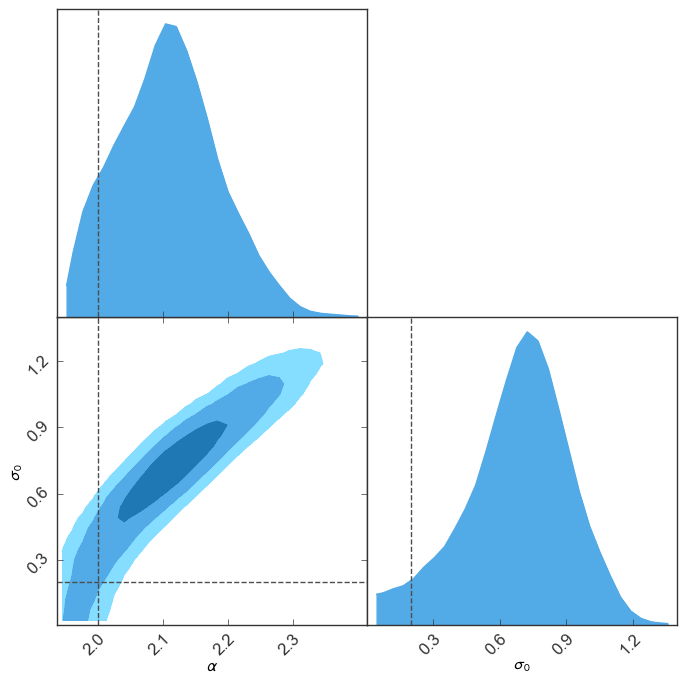

In [19]:
# Labels for the different chains

GTC = pygtc.plotGTC(chains=[stack_simple], 
                    paramNames=params_total[0:2],
                    truths=fid_theta_total[0:2],
                    nContourLevels=3,
                    figureSize=8,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

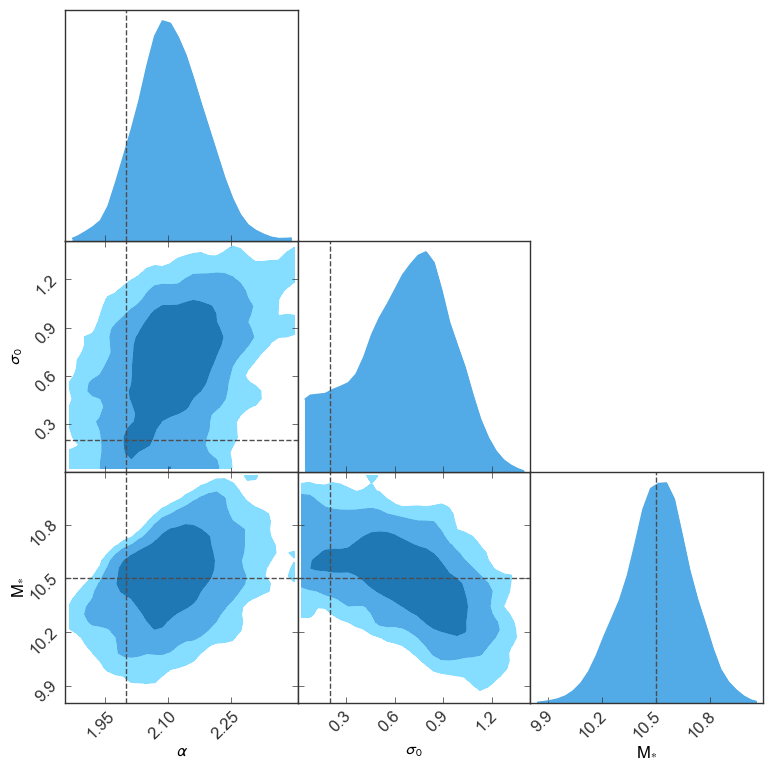

In [20]:
# Labels for the different chains

GTC = pygtc.plotGTC(chains=[stack_anchor], 
                    paramNames=params_total[0:3],
                    truths=fid_theta_total[0:3],
                    nContourLevels=3,
                    figureSize=9,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

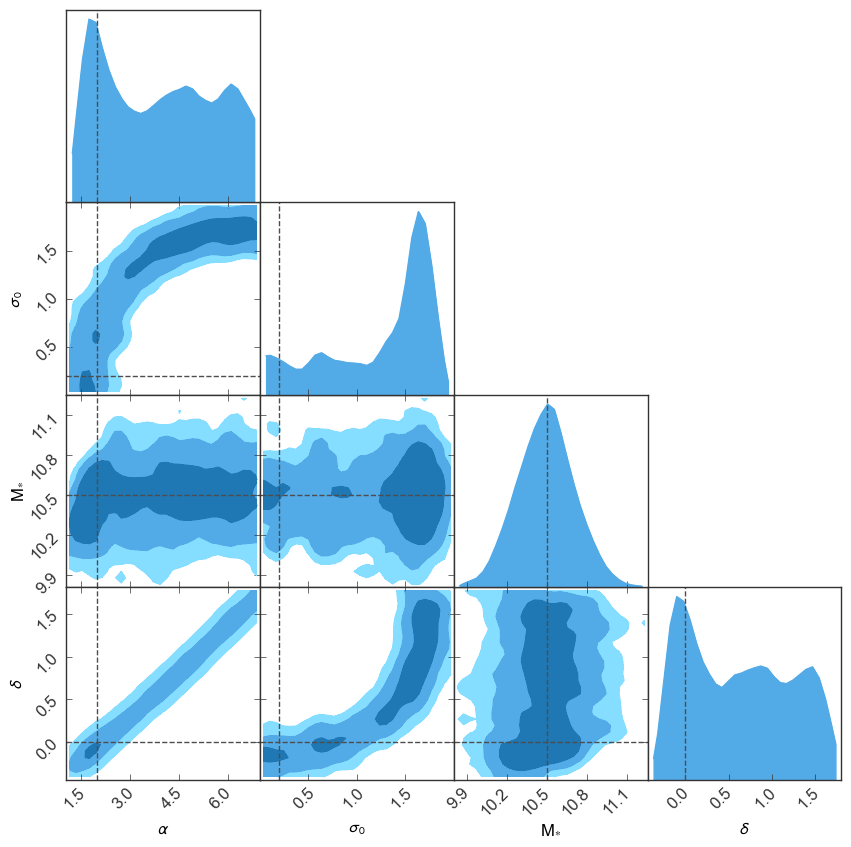

In [21]:
# Labels for the different chains

GTC = pygtc.plotGTC(chains=[stack_curve], 
                    paramNames=params_total[0:4],
                    truths=fid_theta_total[0:4],
                    nContourLevels=3,
                    figureSize=10,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

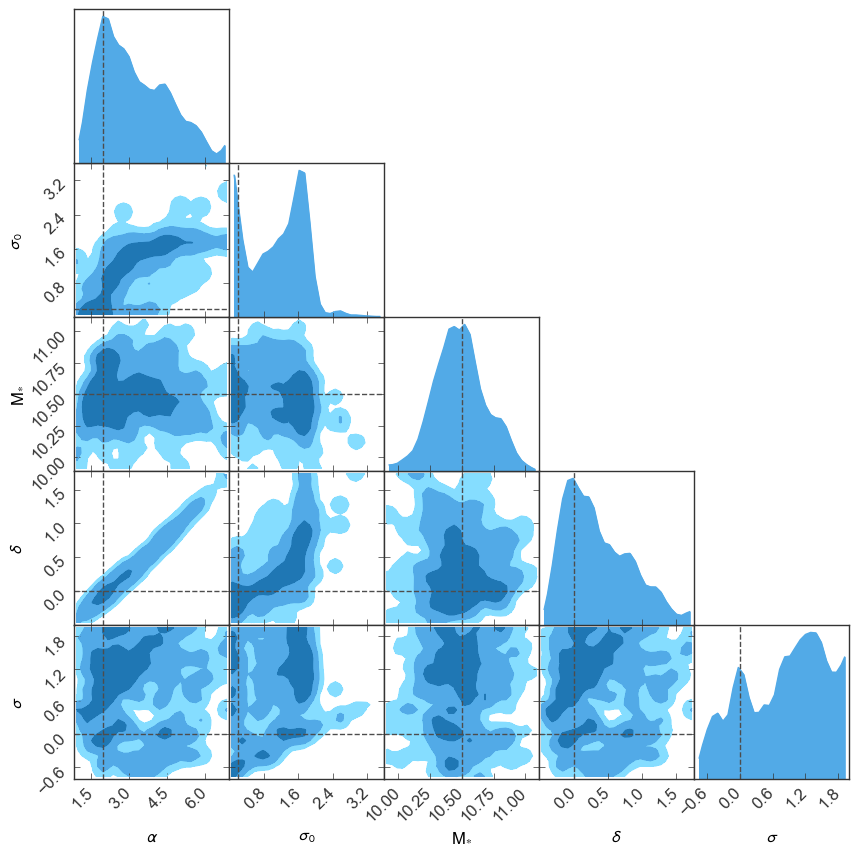

In [22]:
# Labels for the different chains

GTC = pygtc.plotGTC(chains=[stack_sigma], 
                    paramNames=params_total[0:5],
                    truths=fid_theta_total[0:5],
                    nContourLevels=3,
                    figureSize=10,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

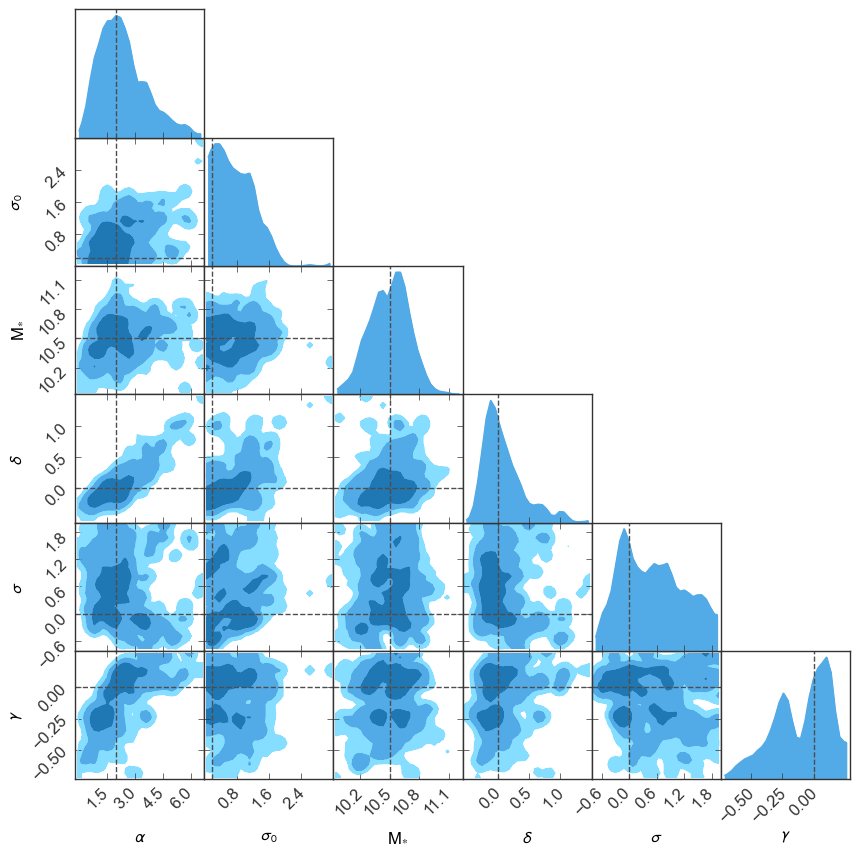

In [23]:
GTC = pygtc.plotGTC(chains=[stack_red], 
                    paramNames=params_total[0:6],
                    truths=fid_theta_total[0:6],
                    nContourLevels=3,
                    figureSize=10,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

In [12]:
alpha = [stack_simple[:,0], stack_anchor[:,0], stack_curve[:,0], stack_sigma[:,0], stack_red[:,0]]
sigma_0 = [stack_simple[:,1], stack_anchor[:,1], stack_curve[:,1], stack_sigma[:,1], stack_red[:,1]]
M_star = [-99, stack_anchor[:,2], stack_curve[:,2], stack_sigma[:,2], stack_red[:,2]]
delta = [-99, -99, stack_curve[:,3], stack_sigma[:,3], stack_red[:,3]]
sigma = [-99, -99, -99, stack_sigma[:,4], stack_red[:,4]]
gamma = [-99, -99, -99, -99, stack_red[:,5]]

In [13]:
fid_theta_total = [2, 0.2, 10.5, 0, 0, 0]
priors_total = [[-1,7], [0,5], [9.8,11.2], [-3,2], [-2,2], [-1,1]]
params_total = ["slope", "sigma_0", "anchor", "curvature", "sigma", "redshift"]

In [14]:
def general_violin(data_list, truths, priors, plabels, mlabels):
    num_plots = len(data_list)
    fig, axes = plt.subplots(num_plots, sharex=True, figsize=(10, 2.5 * num_plots))

    for plot_idx, (data, truth, prior, label) in enumerate(zip(data_list, truths, priors, plabels)):
        parts = axes[plot_idx].violinplot(data, showextrema=False, showmedians=True)

        for pc in parts['bodies']:
            pc.set_facecolor("navy")
        
        median = parts['cmedians']
        median.set_color("blue")
        
        axes[plot_idx].axhline(truth, ls="--", lw=1, color="red")
        axes[plot_idx].set_ylabel(label, fontsize=15)
        axes[plot_idx].set_ylim(prior[0], prior[1])

        if plot_idx == num_plots - 1:
            axes[plot_idx].set_xticks(range(1,6), labels=mlabels)

    plt.show()


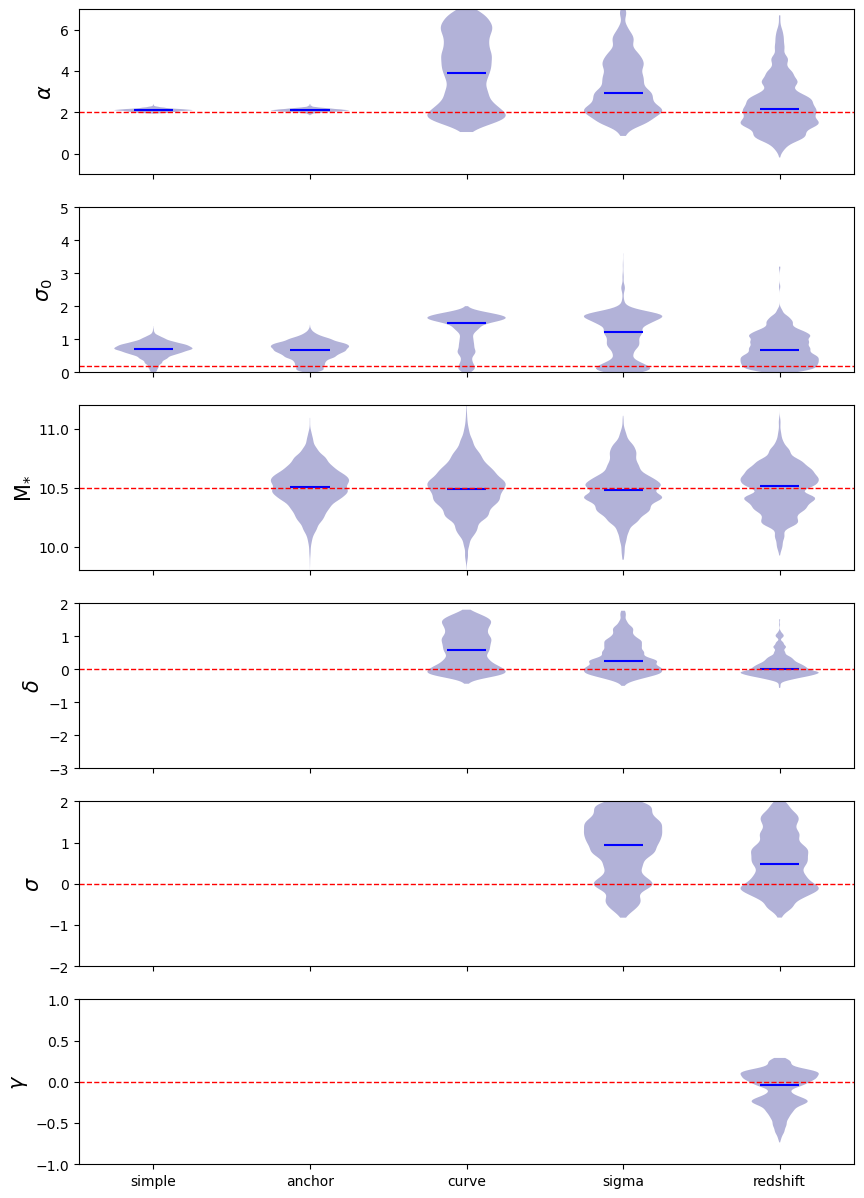

In [15]:
data_list_total = [alpha, sigma_0, M_star, delta, sigma, gamma]
plabels = ["$\\alpha$", "$\\sigma_0$", "M$_{*}$", "$\\delta$", "$\\sigma$", "$\\gamma$"]
mlabels = ["simple", "anchor", "curve", "sigma", "redshift"]

general_violin(data_list_total, fid_theta_total, priors_total, plabels, mlabels)
